## Part 1 - Problem 1, Scatter Polt with a line

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [2]:
scatter_data_filename = 'scatter_data.csv'

In [3]:
def read_scatter_data(filename):
    x_axis = []
    y_axis = []
    with open(filename,'r') as csvfile:
        a = csv.reader(csvfile)
        for rc in a:
            if not rc[0].startswith('%'):
                x_axis.append(float(rc[0])) # converting string to float
                y_axis.append(float(rc[1]))
    return x_axis,y_axis

In [4]:
#defining a function of ScatterPlot
def scatter_plot(x_axis,y_axis):
    x_axismin, y_axismin = min(zip(x_axis,y_axis))
    x_axismax, y_axismax = max(zip(x_axis,y_axis))
    plt.plot(x_axis,y_axis,'g^',label='observations')
    plt.plot([x_axismax,x_axismin],[y_axismax,y_axismin],'r--',label='extreme x points')
    plt.title ('Widget Measurements')
    plt.xlabel('x [inches]')
    plt.ylabel('y [inches]')
    plt.legend()
    plt.show()

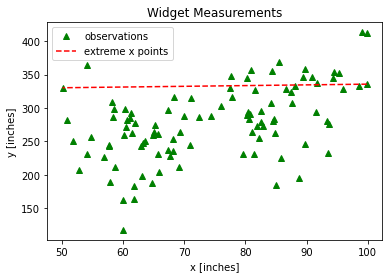

In [5]:
x_axis,y_axis = read_scatter_data(scatter_data_filename)
scatter_plot(x_axis,y_axis)

## Part 1 - Problem 2, Histogram

In [6]:
hist_data_filename = 'student_grades.csv'

In [7]:
def read_q2_data(filename):
    x_axis = []
    y_axis = []
    with open(filename,'r') as csvfile:
        a = csv.reader(csvfile)
        for rc in a:
            if not rc[0].startswith('%'):
                x_axis.append(float(rc[0])) # converting data from string to float
                y_axis.append(float(rc[1]))
    return x_axis,y_axis

In [8]:
def hist_plot(x_axis,y_axis):
#     plt.hist (y_axis, bins = 5,)
    hist_data =[0,0,0,0,0]
    for i in y_axis:
        if i<60:
            hist_data[0] +=1
        elif i <70:
            hist_data[1] +=1
        elif i <80:
            hist_data[2] +=1
        elif i <90:
            hist_data[3] +=1
        else :
            hist_data[4] +=1
    plt.bar(list(range(0,5)),hist_data,color='orange',edgecolor ='black',tick_label = ['F','D','C','B','A'])
    plt.title ('Grade Distribution')
    plt.ylabel('Count')
    plt.xlabel('Grade')
    xlocs,xlabs = plt.xticks()
    for i,v in enumerate(hist_data):
        plt.text(xlocs[i],v+0.4,str(v))
    plt.show()

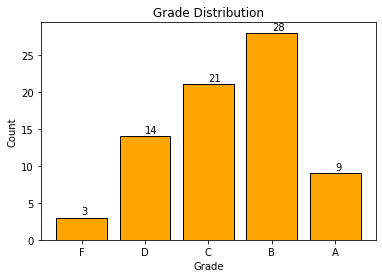

In [9]:
x_axis,y_axis = read_q2_data(hist_data_filename)
hist_plot(x_axis,y_axis)


## Part 1 - Problem3. Barplots and Boxplots in the Same Figure.

In [10]:
barbox_data_filename = 'solution_data.csv'

In [11]:
def read_hist_data(filename):
    method = []
    ovf = []
    problem_id = []
    with open(filename,'r') as csvfile:
        a = csv.reader(csvfile)
        for rc in a:
            if not rc[0].startswith('%'):
                method.append((rc[1])) # converting string to float
                ovf.append(float(rc[2]))
                problem_id.append(float(rc[0]))
    return sorted(zip(problem_id, method, ovf)) #

In [12]:
# formula for gap
def formula(p,q):
    return (q-p)*100/q
def data_processing(barbox_data_filename):
    genetic =[]
    simu = []
    tabu = []
    counter = 1
    a,b,c,d = '','','',''
    data = read_hist_data(barbox_data_filename)
    for i,j,k in data: 
        if counter%4 == 1:
            a = k
        elif counter%4 == 2:
            b = k
        elif counter%4 == 3:
            c = k
        elif counter%4 == 0:
            d = k
            genetic.append(formula(a,b))
            simu.append(formula(c,b))
            tabu.append(formula(d,b))   
        counter+=1
    
    return [genetic, simu, tabu]

In [13]:
data = data_processing(barbox_data_filename)
barplot_data = [(sum(data[0]))/len(data[0]),(sum(data[1]))/len(data[1]),(sum(data[2]))/len(data[2])]

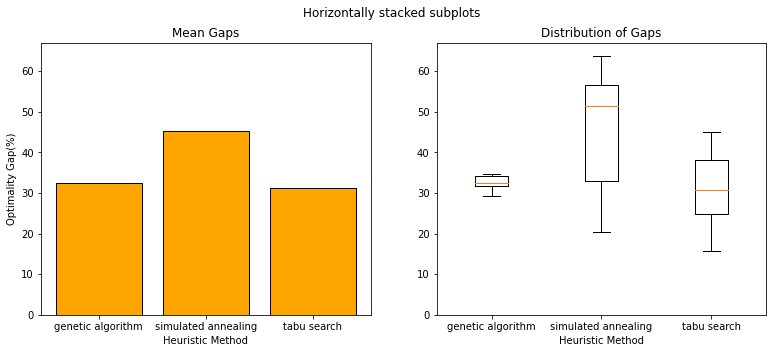

In [14]:
f,(ax1,ax2) = plt.subplots(1,2,sharey = 'all',figsize = (13,5))
f.suptitle('Horizontally stacked subplots')
ax1.set_title('Mean Gaps')
ax2.set_title('Distribution of Gaps')
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('Optimality Gap(%)')
ax2.set_xlabel('Heuristic Method')
ax1.bar(list(range(0,3)),barplot_data,color='orange',edgecolor ='black',tick_label = ['genetic algorithm','simulated annealing','tabu search'])
ax2.boxplot(data)
plt.xticks([1, 2, 3],['genetic algorithm','simulated annealing','tabu search'])
ax2.tick_params(labelleft = True)

## Part 2 Heatmap for a Machine functioning Analysis (Data is self generated).
## The aim here is to plot the time for particular factorswith respect to machince which are affecting production rate.

In [15]:
heatmap_data_filename = 'machine_data.csv'

In [16]:
# Reading and Prosessing data
def read_heat_data(filename):
    factor1 = []
    factor2 = []
    factor3 = []
    factor4 = []
    factor5 = []
    machine = []
    with open(filename,'r') as csvfile:                         # reading data from .csv file format
        a = csv.reader(csvfile)
        for rc in a:
            if not rc[1].startswith('%'):                      # ignoring any rows that begin with the percent sign (%)
                machine.append(rc[0])
                factor1.append(float(rc[1]))                   # converting data from string to float and storing
                factor2.append(float(rc[2]))
                factor3.append(float(rc[3]))
                factor4.append(float(rc[4]))
                factor5.append(float(rc[5]))
    return  machine, factor1, factor2, factor3, factor4, factor5

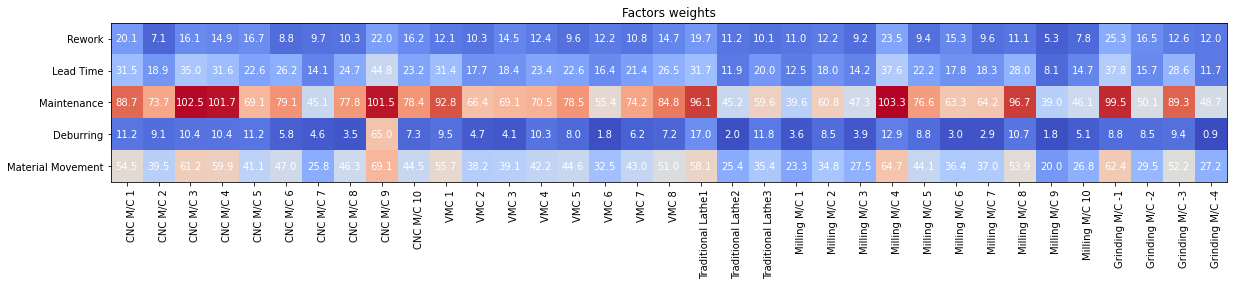

In [17]:
machine, factor1, factor2, factor3, factor4, factor5 = read_heat_data(heatmap_data_filename)  # calling function read_heat_data

# creating a list named 'factors' haveing all values of respective factor to subplot
factors = [factor1[:],factor2[:],factor3[:],factor4[:], factor5[:]]
fig, ax = plt.subplots(figsize = (20,50))

# To label all ticks on X- axis with machine
ax.set_xticks(range(len(machine)))
# label X- axis with machine
ax.set_xticklabels(machine)
# Rotates and locate label on X-axis
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

# label Y- axis with Factors affecting Production
factor_names =['Rework','Lead Time','Maintenance','Deburring','Material Movement']
# To label all ticks on Y- axis with factors
ax.set_yticks(range(len(factor_names)))
ax.set_yticklabels(factor_names)

# Set Title for Heatmap
ax.set_title("Factors weights")

# Plot heatmap
# for color: https://matplotlib.org/stable/tutorials/colors/colormaps.html
im = ax.imshow(factors,cmap = 'coolwarm') 

# To create text annotations for 'i'th machine and 'j'th factor
for i in range(len(machine)):  
    for j in range(len(factor_names)):
        text = ax.text(i, j, factors[j][i],ha="center", va="center", color="w")  # To get location, color and position of texts in subplots

## Part 2 Pie Chart for a Machine Split Cost Analysis (Data is self generated) 

In [18]:
filename = 'pie_data.csv'

In [19]:
def pie_data(filename):
    data = []
    cost = []
    with open(filename,'r') as csvfile:           # reading data from .csv file format
        a = csv.reader(csvfile)
        for rc in a:
            if not rc[0].startswith('%'):        # ignoring any rows that begin with the percent sign (%)
                data.append(rc[0]) 
                cost.append(int(rc[1]))         # converting string to integer
    return data,cost

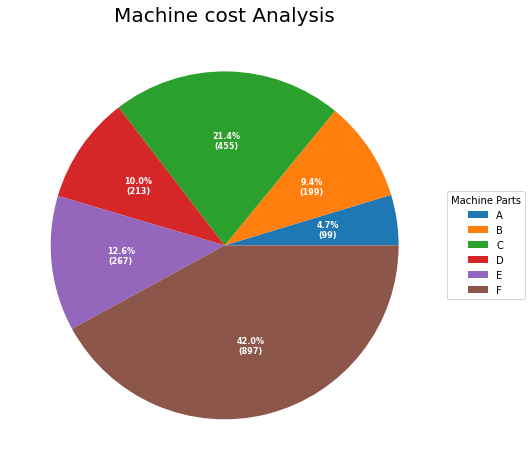

In [20]:
# calling function pie_data
data, cost = pie_data(filename)

# Function to calculate percentage, and getting it to dispaly in foat-(percentage),integer(cost)
def func(c, total):
    absolute = int(c/100.*sum(total))
    return "{:.1f}%\n({:d})".format(c, absolute) # getting it to dispaly in float-(percentage),integer(cost)

# subplot pie diagram, its size
# 3.) Same scaling from data to plot units for x and y
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal")) 

# To text format for legend
wedges, texts, autotexts = ax.pie(cost, autopct=lambda pct: func(pct, cost),textprops=dict(color="w"))
# defining data,label and location for legend
ax.legend(wedges, data,
          title="Machine Parts",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# To text format inside pie
plt.setp(autotexts, size=8, weight="bold") 
ax.set_title("Machine cost Analysis",size = 20) # Set title
plt.show()

In [21]:
# Reference for Heatmap:-1.) https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
# 2.) https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Reference for Piechart:-1.) https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
# 2.)https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
# 3.) https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_aspect.html
